In [1]:
pip install opencv-contrib-python==3.4.2.16

     |████████████████████████████████| 30.6MB 144kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
import cv2
import numpy as np
import os
import pylab as pl
from sklearn.metrics import confusion_matrix, accuracy_score #sreeni
from sklearn.externals import joblib

In [62]:
clf, classes_names, stdSlr, k, voc , idf = joblib.load("/content/drive/My Drive/CAL TECH/bovw.pkl")

In [63]:
test_path = '/content/drive/My Drive/CAL TECH/validate'

In [64]:
testing_names = os.listdir(test_path)

In [65]:
image_paths = []
image_classes = []
class_id = 0

In [31]:
def imglist(path):
    return [os.path.join(path, f) for f in os.listdir(path)]

In [66]:
for testing_name in testing_names:
    dir = os.path.join(test_path, testing_name)
    class_path = imglist(dir)
    image_paths+=class_path
    image_classes+=[class_id]*len(class_path)
    class_id+=1

In [67]:
des_list = []

In [68]:
surf = cv2.xfeatures2d.SURF_create(300)

In [69]:
for image_path in image_paths:
    im = cv2.imread(image_path)
    kpts, des = surf.detectAndCompute(im, None)
    des_list.append((image_path, des))  

In [70]:
descriptors = des_list[0][1]
for image_path, descriptor in des_list[0:]:
    descriptors = np.vstack((descriptors, descriptor)) 

In [72]:
from scipy.cluster.vq import vq    
test_features = np.zeros((len(image_paths), k), "float32")
for i in range(len(image_paths)):
    words, distance = vq(des_list[i][1],voc)
    for w in words:
        test_features[i][w] += 1

In [73]:
nbr_occurences = np.sum( (test_features > 0) * 1, axis = 0)
idf = np.array(np.log((1.0*len(image_paths)+1) / (1.0*nbr_occurences + 1)), 'float32')

In [74]:
test_features = test_features * idf
test_features = stdSlr.transform(test_features)

In [75]:
#Report true class names so they can be compared with predicted classes
true_class =  [classes_names[i] for i in image_classes]
# Perform the predictions and report predicted class names. 
predictions =  [classes_names[i] for i in clf.predict(test_features)]

In [76]:
print ("true_class ="  + str(true_class))
print ("prediction ="  + str(predictions))

true_class =['butterfly', 'butterfly', 'butterfly', 'butterfly', 'binocular', 'binocular', 'binocular', 'binocular', 'bear', 'bear', 'bear', 'bear']
prediction =['butterfly', 'butterfly', 'butterfly', 'butterfly', 'butterfly', 'butterfly', 'bear', 'binocular', 'binocular', 'butterfly', 'binocular', 'butterfly']


In [77]:
def showconfusionmatrix(cm):
    pl.matshow(cm)
    pl.title('Confusion matrix')
    pl.colorbar()
    pl.show()

accuracy =  0.4166666666666667
[[0 2 2]
 [1 1 2]
 [0 0 4]]


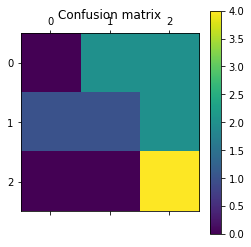

In [78]:
accuracy = accuracy_score(true_class, predictions)
print ("accuracy = ", accuracy)
cm = confusion_matrix(true_class, predictions)
print (cm)

showconfusionmatrix(cm)